# 0:  Loading the MNIST fashion data set

It is already split out into a train and test set,  but the X and y values (label or target) are in single file


I'm going to get you started here a bit,  but pay attention to how I load the data here and the data formats used.

This data came as two csv files, with the filenames as shown

I got the data files from kaggle.com,  this data set is widely distributed

I loaded this as a pandas data frame,  this is a relatively reliable, easy data frame to use

I think this file has a header

See

https://www.kaggle.com/zalando-research/fashionmnist


# load the pandas and numpy libraries 
used for the data frame tools (Pandas) and to define matrices and do linear algebra (Numpy)

In [1]:
import pandas as pd
import numpy as np

The next steps load the test and training data into pandas data frames

Pandas has a dataframe structure much like the R dataframe, or an SQL table

There are many pandas member functions that do useful operations on the data frame,  here the 
read_csv() member function is used to load csv files into data frames.

The infile style variables need to have the full path name to the location of the data files 
in us

In [2]:
train_infile="fashion-mnist_train.csv"

test_infile="fashion-mnist_test.csv"

train_df=pd.read_csv(train_infile)

test_df=pd.read_csv(test_infile)

Let's look at the available member function for a pandas data frame

In [3]:
dir(test_df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '

In [4]:
test_df.columns[0:5]

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4'], dtype='object')

In [5]:
test_df.shape

(10000, 785)

In [6]:
train_df.shape

(60000, 785)

Okay,  I'm expecting 28 x 28 greyscale images again,  we have the first column as the label, the rest of this is the pixels

Most skearn models will accept pandas dataframes as input data,   so I don't think we need to do much here except split out 
the first column as y and the rest of the df as X

pandas has a member function called pop that removes a row from the dataframe.  We'll use that to both set y_train equal to the labels, and X_train to the remaining df

In [7]:
y_train=train_df.pop('label')
X_train=train_df


In [8]:
print(y_train.shape)
print(X_train.shape)

(60000,)
(60000, 784)


In [9]:
y_test=test_df.pop('label')
X_test=test_df

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

The % symbol indicates that this is a magic function,  that is to say a function
command for the jupyter notebook server, not to the python kernel

This particular command causes plots created using the matplotlib libary to print in the 
notebook not in a new window

In [10]:
%matplotlib inline

## 1: Data plots

Okay here is the visualization of one image, a shirt

Note:   I use a location slice of the X_train dataframe,    X_train.loc[0,:] to get row zero, all entries,  or the first
    image in the array.   I then force that into the np.array form so I can use the reshape() member function to reshape the
    row of data into a 28 x 28 image.
    
    I don't think that pandas easily allows the reshape maneuver, so that's why I converted to an np.array,  the
    reshape operation produces an np matrix that can be plotted with imshow.  There may be a better way to do this.  Hmm.
    
Also I checked, and we can feed X_train into the training input of the classifier as a pd.dataframe, there is no need to change
the format

Most sklearn models will accept either pandas dataframes or np matrices as inputs,  which is a help

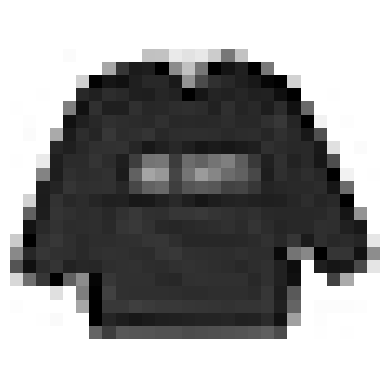

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X_train.loc[0,:])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [12]:
y_train[0]

2

# Question/Action

What type of cloting is this image supposed to be?   Insert a cell with your answer below

This is the 2nd kind in the target so Pullover.

#Question/Action

Show images of a sandal and a sneaker from this data set, show them in cells below

Show all your steps

In [13]:
#Going to show sandal(5) and a sneaker(7)
#print(y_train[7])
#print(y_train[21])


mask = y_train.isin([5])
#mask[:21]
SandleIndex = np.nonzero(np.array(mask))
SandleIndex=SandleIndex[0][0]
mask = y_train.isin([7])
#mask[:21]
SneakerIndex = np.nonzero(np.array(mask))[0][0]


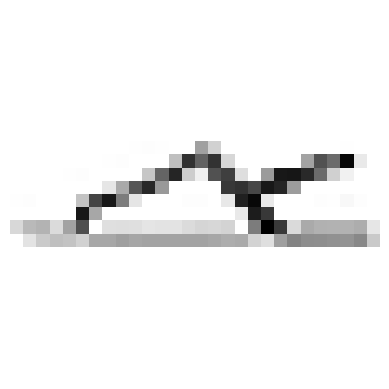

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X_train.loc[SandleIndex,:])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

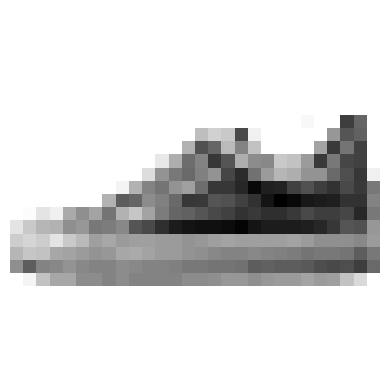

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X_train.loc[SneakerIndex,:])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

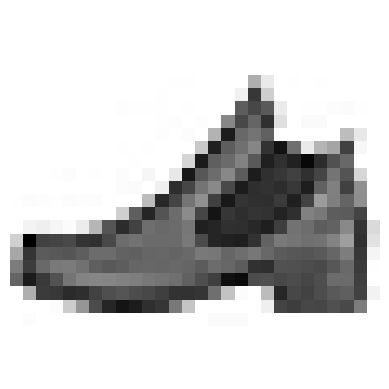

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X_train.loc[1,:])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [17]:
y_train[1]

9

## 2: Time to Build some models

Lets build two different classifying neural net models

fclf - this should classify each image to one of the ten label classes (0-9)

fclf2- classify everything as either a pullover (2) or not a pullover, this is a binary categorization

In [18]:
y_train_2=(y_train==2)
y_test_2=(y_test==2)

## Okay, go build some models-Assignment

1.) For each model find the accuracy, the confusion matrix, the precision and the recall, label these all/
    Look at the confusion matrix,  explain which classes of objects were most likely to be confused with
    each other and which were most distinct.  Explain why you think this happens,  does it make sense?

    I ran these quickly (so I know this works) and got 87.7 % accuracy for the X-train data set using all 10 classes and 
    97.7 % accuracy  for the binary classification (ie the pullover detector).  See if you can beat the quick results I got.       Post your results in the discussion section of D2L for this week.  Discuss what you did to beat my score

2.) Also, create the ROC curve for the binary classifier and compute the AUC for the ROC,  for the binary classifier,  but not for the 10 element classifier

3.) When you are done with steps 1 and 2,   use your two classifier models to classify the test data.
    Is there evidence of overfitting?  What tells you this?


Print your completed jupyter notebook to a pdf file,  you can use the browser to print to pdf.  Upload this to dropbox in D2L to submit the homework.

## Model fclf,  classify fashion image to 10 categories

## First lets build fclf - this should classify each image to one of the ten label classes (0-9)

To improve performance I am going to increase the hidden layer sizes.

In [22]:
# multi catagory classification
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(28,14,7), verbose=True, warm_start=False)

clf.fit(X_train, y_train)


Iteration 1, loss = 3.01173995
Iteration 2, loss = 1.49290983
Iteration 3, loss = 1.26351452
Iteration 4, loss = 1.08092941
Iteration 5, loss = 0.95217684
Iteration 6, loss = 0.85769123
Iteration 7, loss = 0.80354189
Iteration 8, loss = 0.76014074
Iteration 9, loss = 0.74071699
Iteration 10, loss = 0.71992289
Iteration 11, loss = 0.69498030
Iteration 12, loss = 0.65479113
Iteration 13, loss = 0.62746111
Iteration 14, loss = 0.59328588
Iteration 15, loss = 0.58704561
Iteration 16, loss = 0.56617290
Iteration 17, loss = 0.55038780
Iteration 18, loss = 0.54214097
Iteration 19, loss = 0.53381012
Iteration 20, loss = 0.52889403
Iteration 21, loss = 0.50821149
Iteration 22, loss = 0.50475929
Iteration 23, loss = 0.50099703
Iteration 24, loss = 0.48823128
Iteration 25, loss = 0.48066324
Iteration 26, loss = 0.48427558
Iteration 27, loss = 0.47471865
Iteration 28, loss = 0.46706446
Iteration 29, loss = 0.46301338
Iteration 30, loss = 0.46183543
Iteration 31, loss = 0.45288493
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(28, 14, 7), max_iter=500,
              random_state=1, verbose=True)

# prediction outputs

In [24]:
clf.predict_proba(X_test[:10])

array([[9.31739650e-001, 6.16362198e-005, 1.09991332e-003,
        2.55270534e-003, 1.68522453e-004, 4.48340385e-005,
        5.84922959e-002, 3.06156353e-006, 5.83530156e-003,
        2.07973552e-006],
       [3.29474679e-017, 9.99999996e-001, 6.60667054e-016,
        2.21178613e-009, 7.37123342e-010, 1.09426641e-018,
        3.54877942e-019, 1.92911295e-010, 4.27977476e-014,
        8.79375645e-010],
       [9.70858118e-003, 7.20311121e-009, 8.43359470e-001,
        4.72993536e-005, 2.03016564e-002, 3.94472669e-048,
        1.22118943e-001, 8.83120683e-054, 4.46404368e-003,
        4.14802867e-046],
       [2.53959745e-001, 1.23272834e-004, 5.74443878e-001,
        3.52174531e-003, 1.54316419e-002, 1.69421160e-022,
        1.36364564e-001, 2.63767586e-023, 1.61551523e-002,
        2.77514620e-021],
       [4.67791878e-007, 4.83021231e-005, 8.23149217e-008,
        9.49788391e-001, 5.00498110e-002, 4.50276023e-021,
        8.76634266e-005, 8.34198438e-032, 2.52823280e-005,
        3.3

In [25]:
clf.predict(X_test[:20])

# this is looking vary clean based on these first few outputs

array([0, 1, 2, 2, 3, 6, 8, 6, 5, 0, 3, 4, 4, 6, 8, 5, 6, 3, 6, 4],
      dtype=int64)

In [26]:
y_pred=clf.predict(X_train)

#Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix

my_cm=confusion_matrix(y_train,y_pred,labels=[0,1,2,3,4,5,6,7,8,9])
my_cm

array([[5287,    3,   43,  105,    9,    1,  484,    1,   67,    0],
       [   6, 5917,    1,   68,    4,    0,    1,    0,    3,    0],
       [ 147,    1, 4443,   27,  685,    0,  675,    0,   22,    0],
       [ 157,   12,    3, 5638,   99,    1,   81,    1,    7,    1],
       [  28,    3,  215,  343, 4996,    0,  406,    0,    9,    0],
       [   0,    0,    0,    4,    0, 5979,    0,    1,   12,    4],
       [ 899,    1,  216,  114,  207,    0, 4484,    0,   79,    0],
       [   1,    0,    0,    0,    0,   24,    0, 5882,    2,   91],
       [  30,    1,   16,   21,   21,    3,   53,    5, 5850,    0],
       [   0,    0,    0,    0,    0,   13,    1,   72,    1, 5913]],
      dtype=int64)

add up all the correct predictions

In [28]:
my_cm.trace()

54389

Sum everything

In [29]:
my_cm.sum()

60000

Now we computer the accuracy Accuracy= (sum along the diagonals)/(sum of all cells)

In [30]:
my_cm.trace()/my_cm.sum()

0.9064833333333333

Accuracy of 90% as I increased the size of the hidden layers.

#### fclf2- classify everything as either a pullover (2) or not a pullover, this is a binary categorization


In [31]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(28,14,7), verbose=True, warm_start=False)

clf.fit(X_train, y_train_2)


Iteration 1, loss = 0.33152647
Iteration 2, loss = 0.17161349
Iteration 3, loss = 0.15113460
Iteration 4, loss = 0.14102883
Iteration 5, loss = 0.13372817
Iteration 6, loss = 0.13099708
Iteration 7, loss = 0.12559481
Iteration 8, loss = 0.12497487
Iteration 9, loss = 0.12217216
Iteration 10, loss = 0.12064623
Iteration 11, loss = 0.12009686
Iteration 12, loss = 0.11887566
Iteration 13, loss = 0.11518302
Iteration 14, loss = 0.11347581
Iteration 15, loss = 0.11126001
Iteration 16, loss = 0.11680107
Iteration 17, loss = 0.11417252
Iteration 18, loss = 0.11171394
Iteration 19, loss = 0.11088090
Iteration 20, loss = 0.10844318
Iteration 21, loss = 0.11303384
Iteration 22, loss = 0.10799046
Iteration 23, loss = 0.11087234
Iteration 24, loss = 0.10860177
Iteration 25, loss = 0.10617928
Iteration 26, loss = 0.10862779
Iteration 27, loss = 0.10807904
Iteration 28, loss = 0.10481950
Iteration 29, loss = 0.10633957
Iteration 30, loss = 0.10689126
Iteration 31, loss = 0.10330957
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(28, 14, 7), max_iter=500,
              random_state=1, verbose=True)

In [32]:
#Testing how well the model works

In [33]:
silent_clf = MLPClassifier(solver='adam',activation='relu', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(20,20,5), verbose=False, warm_start=True)

In [34]:
#Import cross validation to do the same thing as the multi_group classifier

In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(silent_clf, X_train, y_train_2, cv=3)

Get the confusion mattrix

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_2,y_train_pred)

array([[52791,  1209],
       [ 1352,  4648]], dtype=int64)

Fraction of correct classification

In [37]:
n_correct = sum(y_train_pred == y_train_2)
print(n_correct / len(y_train_pred))

0.9573166666666667


# Action
show all the performance measures used in the MNIST digit classifier answer 
seen in class